In [1]:
%pip install -r requirements.txt --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path
from os.path import basename, splitext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gpt_mini.midi_encoder as midichar
import csv
import math
import json
from gpt_mini.indexable_set import IndexableSet

In [3]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.ERROR)

In [4]:
ITEM_SIZE=36 #(48)

try:
    i = 0
    # iset = IndexableSet(50257)
    with open("training_data.txt", 'a') as file:
        for path in Path('datasets/lmd_full').rglob('*.mid'):
            name, _ = splitext(basename(path))
            enc = midichar.encode_midi(
                midi_file=str(path),
                window_size=ITEM_SIZE,
                instrument_name="Standard Kit")

            if enc is not None:
                # enc = iset.index_array(enc)
                i += 1
                file.write(str(enc.tolist())+"\n")
            if i == 8000:
                break
except Exception as e:
    print(f"An error occurred: {e}")


could not load datasets/lmd_full/9/9daedd9c5a390069a9cdf98bc1e05565.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/94078e08bc697e5ec566640c527de726.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/911cd08fa1fae36e5e0c01c6fffd34bc.mid because MThd not found. Probably not a MIDI file
could not load datasets/lmd_full/9/9d37fb70bc6886e39870ba849195c002.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/98b15bd7d6c776499d67468410a297ae.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/9ea721910ad4264e3ad017a8a9042733.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/9fa6d03382c027c16991037a29cb2254.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/9e27432a37be37beb1550a874f37d50e.mid because 'NoneType' object has no attribute 'notes'
could not load dat

/Users/robrohan/miniconda3/envs/comp838/lib/python3.11/site-packages/pretty_midi/pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


could not load datasets/lmd_full/9/9df3b7e1cb19c6068412414a73c42c93.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/963566dc057a2f28be076c09ff9cbbcb.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/96556733dd40f1d993503519edce9f76.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/98f39723e80a2052d5052807f86de57a.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/98169b00da5aa097aeca3aaedac929ba.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/9d67bc86f7e6baef373845cb818db4b4.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/9ba728a6174777fd94660fea4a430f64.mid because 'NoneType' object has no attribute 'notes'
could not load datasets/lmd_full/9/9d4b20cadb6f4a8909b2a73bad2c0014.mid because 'NoneType' object has no attribute 'notes'
could not load d

In [5]:
df = pd.read_csv("training_data.txt", delimiter="\t", header=None, names=['data'])
display(df.head())

,data
0,"[33860, 10026, 7152682, 14296106, 21439530, 28..."
1,"[29508, 32802482, 32802219, 32802498, 32802344..."
2,"[219204, 48268342, 48288803, 53959734, 5397612..."
3,"[53828, 71768755, 71769507, 77601459, 83434035..."
4,"[36932, 353898404, 353898403, 353897640, 35389..."


/var/folders/ks/zt1_dy0976s0n809crmcsppc0000gn/T/ipykernel_34912/823027275.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = np.array( json.loads(df.loc[2][0]) , dtype=np.int32 )


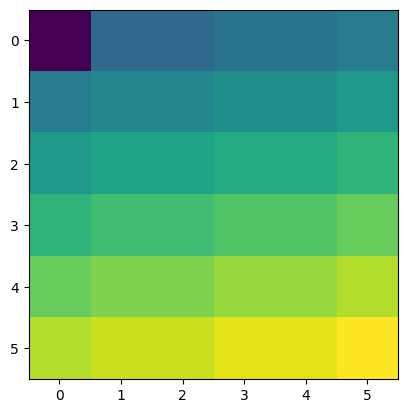

In [7]:
sqr = int(math.sqrt(ITEM_SIZE))
# print(sqr, ITEM_SIZE)
# print(df.loc[10][0])
sample = np.array( json.loads(df.loc[2][0]) , dtype=np.int32 )
# sample = iset.reverse_index_array(sample)

# print(type(sample))
plt.imshow(np.reshape(sample, (-1,sqr)))
plt.show()

In [8]:
midichar.decode_midi(notes=sample,
                     out_file="output/batch.mid",
                     instrument_name="Standard Kit")

In [10]:
# def plot_value_distribution(indexable_set):
#     # Extract the values from the dictionary
#     values = list(indexable_set.dictionary.values())
#     # Plot the distribution of values
#     plt.hist(values, bins=range(min(values), max(values) + 2), align='left')
#     plt.xlabel('Index Values')
#     plt.ylabel('Frequency')
#     plt.title('Distribution of Index Values')
#     plt.xticks(range(min(values), max(values) + 1))
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.show()

# plot_value_distribution(iset)